# Laplace Equation & Possion Equations

In this Lab, we will learn how to numerically solve Laplace and Possion equations, which are common equations in electromagnestism and gravitational problems. 

There should be two files under `./poisson_solver`.\
1. `mesh.py` handles the mesh grids we will used in this Lab.\
2. `solvers.py` handles all corresponding iterative solvers for Laplace/Poisson Equation. 

In [1]:
import numpy as np
import numba as na
import matplotlib.pyplot as plt
import time

from poisson_solver.mesh import Mesh2D
from poisson_solver.solvers import *

## Exercise 4: Jacobi method

1. Test your Mesh2D class to see if you could generate the grids we need for this calculation
2. Implement the Jacobi meothd in `./poisson_solver/solver.py`.
3. Write a function called `updata_boundary()` to update the boundary conditions.\
   Where to put this `update_boundary()` function is up to you.\
   You could put it either inside the `Mesh2D` class, in `solvers.py`, or here.

In [2]:
nx = 3
ny = 3
buff_size = 1
xmin = -1
xmax = 1
ymin = -2
ymax = 2

istart = 1
istartGC = 0
iend = nx - 2 + 2*buff_size
iendGC = nx-1
jstart = 1
jstartGC = 0
jend = nx - 2
jendGC = nx-1

mesh = Mesh2D(nx, ny, buff_size, xmin, xmax, ymin, ymax)

print(mesh.mesh.shape)
print(mesh.xx)
print(mesh.yy)

(5, 5)
[[-1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1. ]]
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


### Visualize your results

Calculation time for Jacobi method: 0.32783007621765137
Calculation time for Gauss-Seidel method: 0.1580038070678711


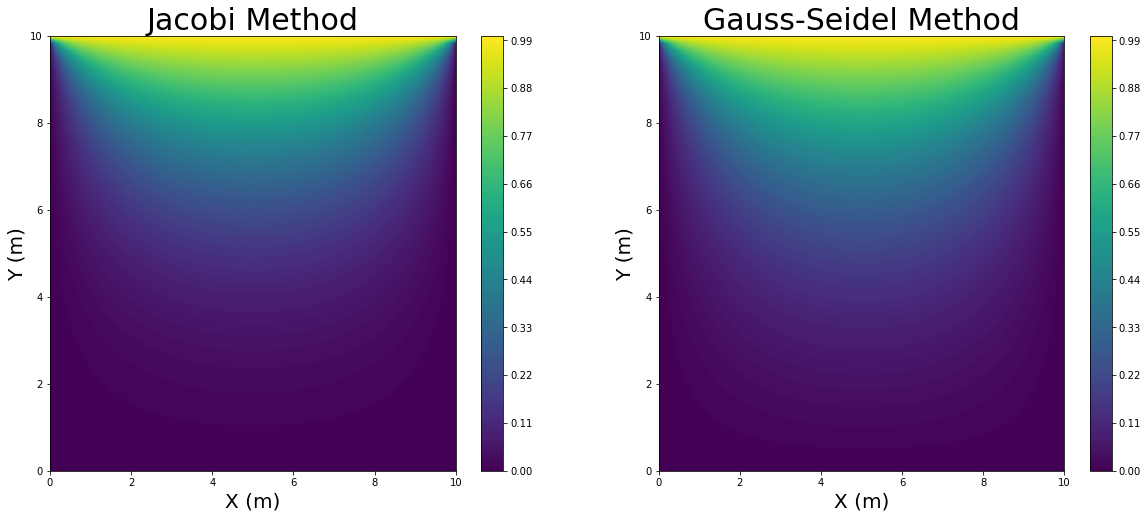

In [3]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,8), ncols = 2)

@jit
def I1(Vi, Vf, N):
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1])
    return Vf

@jit
def I2(Vi, Vf, N):
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vi[i+1,j] + Vf[i,j-1] + Vi[i,j+1])
    return Vf

num = 64

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = np.zeros((num,num))
V1[0,:] = np.full(num,0)
V1[num-1,:] = np.full(num,0)
V1 = V1.T
V1[0,:] = np.full(num,0)
V1[num-1,:] = np.full(num,1)

V2 = np.zeros((num,num))
V2[0,:] = np.full(num,0)
V2[num-1,:] = np.full(num,0)
V2 = V2.T
V2[0,:] = np.full(num,0)
V2[num-1,:] = np.full(num,1)


error = 1
error_1 = []
error_2 = []
tolerance = 1e-6

s = time.time()
while error > tolerance:
    V1_old = np.array(V1)
    V1 = I1(V1_old, V1, num)
    error = np.sqrt(np.sum((V1 - V1_old)**2))/num**2
    error_1.append(error)
e = time.time()

print('Calculation time for Jacobi method:', e-s)

error = 1    

s = time.time()
while error > tolerance:
    V2_old = np.array(V2)
    V2 = I2(V2_old, V2, num)
    error = np.sqrt(np.sum((V2 - V2_old)**2))/num**2
    error_2.append(error)
e = time.time()

print('Calculation time for Gauss-Seidel method:', e-s)

cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)
fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30);

plt.savefig('P1.pdf')

### Error convergence.

To see how it converge, we could make a of Error vs. Iteration times to see how it converges.

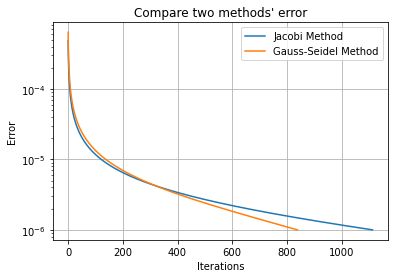

In [4]:
plt.plot(error_1, label='Jacobi Method')
plt.plot(error_2, label='Gauss-Seidel Method')

plt.yscale('log')
plt.legend()
plt.grid()
plt.title('Compare two methods\' error')
plt.xlabel('Iterations')
plt.ylabel('Error');
plt.savefig('P2.pdf')

## Exercise 5: Gauss-Seidel Meothd.

1. Implement the Gauss-Seidel meothd in your solver.
2. Repeat exercise 4. for the Gauss-Seidel meothd.
3. Compare the error convergence between Jacobi and Gauss-Seidel

## Exercise 6: Successive Over-Relaxation (SOR) method.

1. Implment the SOR method in your solver.
2. Repeart exercise 5 for the SOR method.
3. Compare the error convergence with all other methods.

Calculation time for Jacobi method: 3.6313090324401855
Calculation time for Gauss-Seidel method: 4.074454069137573
Calculation time for SOR method: 4.6383562088012695


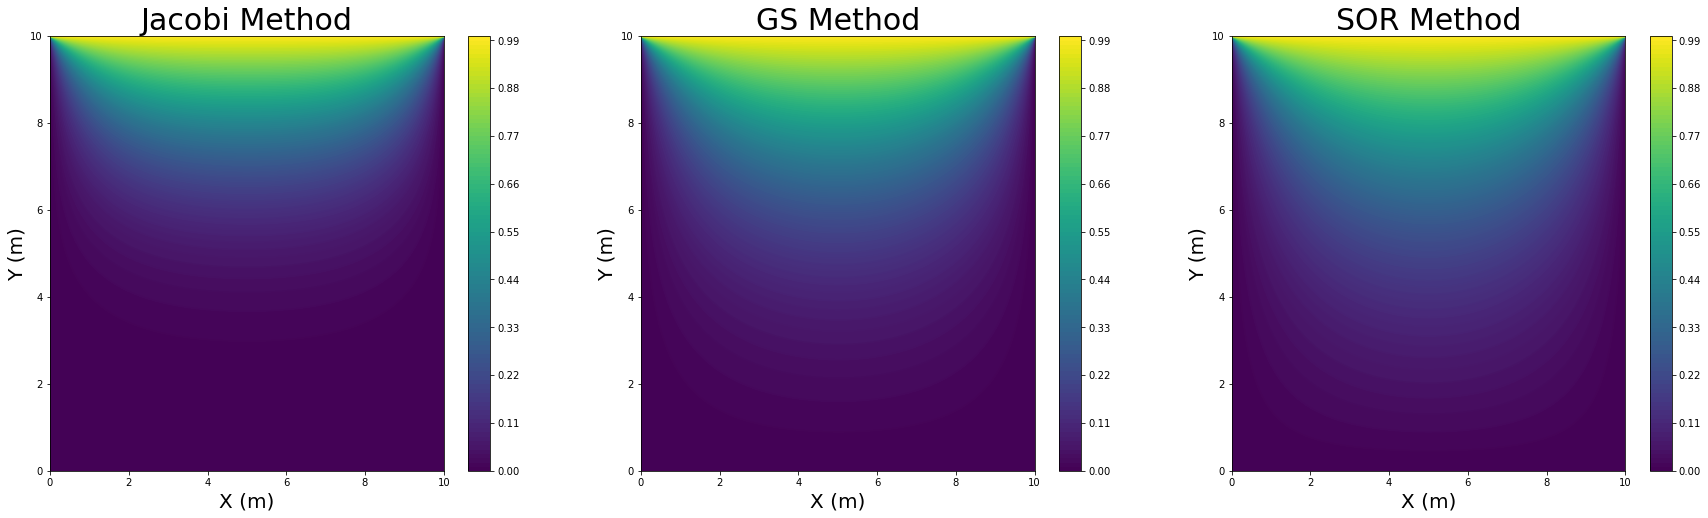

In [15]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (30,8), ncols = 3)

@jit
def I1(Vi, Vf, N):
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1])
    return Vf

@jit
def I2(Vi, Vf, N):
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vi[i+1,j] + Vf[i,j-1] + Vi[i,j+1])
    return Vf

num = 2**8+1

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = np.zeros((num,num))
V1[0,:] = np.full(num,0)
V1[num-1,:] = np.full(num,0)
V1 = V1.T
V1[0,:] = np.full(num,0)
V1[num-1,:] = np.full(num,1)

V2 = np.zeros((num,num))
V2[0,:] = np.full(num,0)
V2[num-1,:] = np.full(num,0)
V2 = V2.T
V2[0,:] = np.full(num,0)
V2[num-1,:] = np.full(num,1)

V3 = np.zeros((num,num))
V3[0,:] = np.full(num,0)
V3[num-1,:] = np.full(num,0)
V3 = V3.T
V3[0,:] = np.full(num,0)
V3[num-1,:] = np.full(num,1)


error_1 = []
error_2 = []
error_3 = []
tolerance = 1e-8
N_max = 10000

error = 1
count = 0

s = time.time()
while error > tolerance:
    count += 1
    V1_old = np.array(V1)
    V1 = I1(V1_old, V1, num)
    error = np.sqrt(np.sum((V1 - V1_old)**2))/num**2
    error_1.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for Jacobi method:', e-s)

error = 1
count = 0

s = time.time()
while error > tolerance:
    count += 1
    V2_old = np.array(V2)
    V2 = I2(V2_old, V2, num)
    error = np.sqrt(np.sum((V2 - V2_old)**2))/num**2
    error_2.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for Gauss-Seidel method:', e-s)

error = 1
count = 0

w = 1.5

s = time.time()
while error > tolerance:
    count += 1
    V3_old = np.array(V3)
    V3_GS = I2(V3_old, V3, num)
    V3 = (1-w)*V3_old + w*V3_GS
    error = np.sqrt(np.sum((V3 - V3_old)**2))/num**2
    error_3.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method:', e-s)

cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)

cs3 = ax[2].contour(X, Y, V3, levels = 100)
cs3 = ax[2].contourf(X, Y, V3, levels = 100)

fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);
fig.colorbar(cs3,ax=ax[2]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('GS Method', fontsize = 30);


ax[2].set_xlabel('X (m)', fontsize = 20)
ax[2].set_ylabel('Y (m)', fontsize = 20)
ax[2].set_title('SOR Method', fontsize = 30);

plt.savefig('P3.pdf')

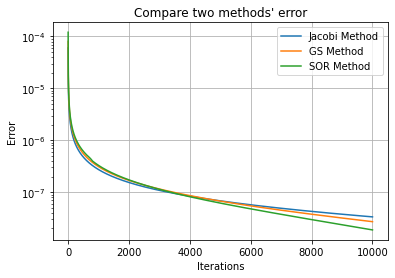

In [16]:
plt.plot(error_1, label='Jacobi Method')
plt.plot(error_2, label='GS Method')
plt.plot(error_3, label='SOR Method')

plt.yscale('log')
plt.legend()
plt.grid()
plt.title('Compare two methods\' error')
plt.xlabel('Iterations')
plt.ylabel('Error');
plt.savefig('P4.pdf')

In [7]:
'''

@jit
def I2(Vi, Vf, N):
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vi[i+1,j] + Vf[i,j-1] + Vi[i,j+1])
    return Vf

num = 64

ws = np.linspace(1.3,1.7,101)
cs = []

tolerance = 1e-8

for w in ws:
    
    V3 = np.zeros((num,num))
    V3[0,:] = np.full(num,0)
    V3[num-1,:] = np.full(num,0)
    V3 = V3.T
    V3[0,:] = np.full(num,0)
    V3[num-1,:] = np.full(num,1)
    
    error = 1
    count = 0
    
    while error > tolerance:
        count += 1
        V3_old = np.array(V3)
        V3_GS = I2(V3_old, V3, num)
        V3 = (1-w)*V3_old + w*V3_GS
        error = np.sqrt(np.sum((V3 - V3_old)**2))/num**2
        if count >5000:
            break
    
    cs.append(count)
'''

'\n\n@jit\ndef I2(Vi, Vf, N):\n    for i in range(N):\n        for j in range(N):\n            if i != 0 and i != N-1 and j != 0 and j != N-1:\n                \n                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vi[i+1,j] + Vf[i,j-1] + Vi[i,j+1])\n    return Vf\n\nnum = 64\n\nws = np.linspace(1.3,1.7,101)\ncs = []\n\ntolerance = 1e-8\n\nfor w in ws:\n    \n    V3 = np.zeros((num,num))\n    V3[0,:] = np.full(num,0)\n    V3[num-1,:] = np.full(num,0)\n    V3 = V3.T\n    V3[0,:] = np.full(num,0)\n    V3[num-1,:] = np.full(num,1)\n    \n    error = 1\n    count = 0\n    \n    while error > tolerance:\n        count += 1\n        V3_old = np.array(V3)\n        V3_GS = I2(V3_old, V3, num)\n        V3 = (1-w)*V3_old + w*V3_GS\n        error = np.sqrt(np.sum((V3 - V3_old)**2))/num**2\n        if count >5000:\n            break\n    \n    cs.append(count)\n'

In [8]:
'''
plt.plot(ws,cs);
plt.xlabel('w')
plt.ylabel('count')
plt.grid()
print('The optimized w is',ws[cs.index(min(cs))])
plt.savefig('P5.pdf')
'''

"\nplt.plot(ws,cs);\nplt.xlabel('w')\nplt.ylabel('count')\nplt.grid()\nprint('The optimized w is',ws[cs.index(min(cs))])\nplt.savefig('P5.pdf')\n"

## Exercise 7: Extend your solver for calculating Poisson's Equation.

1. Repeat exercise 3 for solving the Poisson's equation but use iteractive methods.

# Multi-Grid Method

Calculation time for MG method: 1.0943810939788818


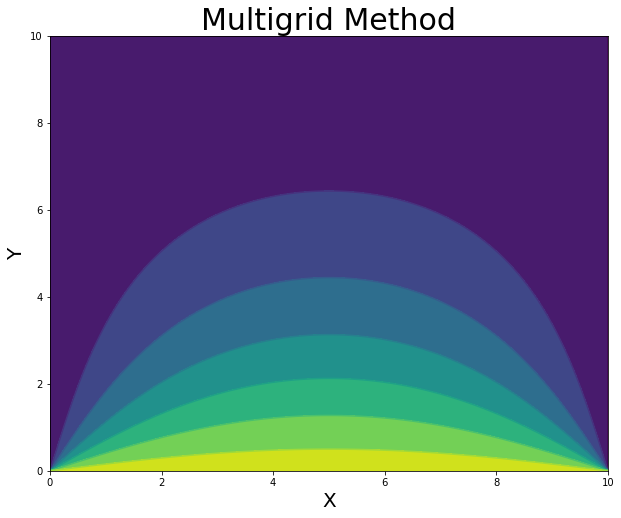

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def create_V(n):
    num = 2**(n) + 1
    V = np.zeros((num,num))
    V[0,:] = 100
    return V

def iterate_V(V, tolerance, step, es):
    num = len(V)
    count = 0
    while True:
        Vi = np.array(V)
        V[step:num-step:step,step:num-step:step] = 0.25*(V[step:num-step:step, 0:num-2*step:step]+V[step:num-step:step, 2*step:num:step]+V[0:num-2*step:step, step:num-step:step]+V[2*step:num:step, step:num-step:step])
        Vf = np.array(V)
        count += 1
        error = converge_V(Vi, Vf, num)
        es.append(error)
        if error < tolerance:
            break
    return V, count

def update_V(V, n, tolerance):
    num = 2**n + 1
    cs = []
    es = []
    for i in range(n):
        step = 2**(n-i-1)
        V[step:num-step:2*step, step:num-step:2*step] = 0.25*(V[0:num-2*step:2*step, 0:num-2*step:2*step] + V[0:num-2*step:2*step, 2*step:num:2*step] + V[2*step:num:2*step, 2*step:num:2*step] + V[2*step:num:2*step, 0:num-2*step:2*step])
        V[2*step:num-2*step:2*step, step:num-step:2*step] = 0.5*(V[2*step:num-2*step:2*step, 0:num-2*step:2*step] + V[2*step:num-2*step:2*step, 2*step:num:2*step])
        V[step:num-step:2*step, 2*step:num-2*step:2*step] = 0.5*(V[0:num-2*step:2*step, 2*step:num-2*step:2*step] + V[2*step:num:2*step, 2*step:num-2*step:2*step])
        V, count = iterate_V(V, tolerance, step, es)
        cs.append(count)
    return V, cs, es

def plot_V(V):
    num = len(V)
    fig, ax = plt.subplots(figsize = (10,8), ncols=1)
    x = np.linspace(0,10,num)
    y = np.linspace(0,10,num)
    X, Y = np.meshgrid(x,y)
    ax.contour(X,Y,V)
    ax.contourf(X,Y,V)
    ax.set_xlabel('X', fontsize = 20)
    ax.set_ylabel('Y', fontsize = 20)
    ax.set_title('Multigrid Method', fontsize = 30)

def converge_V(Vi, Vf, num):
    error = np.sqrt(np.sum((Vf - Vi)**2))/num**2
    return error

n = 8
tolerance = 1e-8
V = create_V(n)
V_normal = create_V(n)
s = time.time()
V, cs, error_MG = update_V(V, n, tolerance)
e = time.time()
print('Calculation time for MG method:', e-s)
plot_V(V)

plt.savefig('P6.pdf')

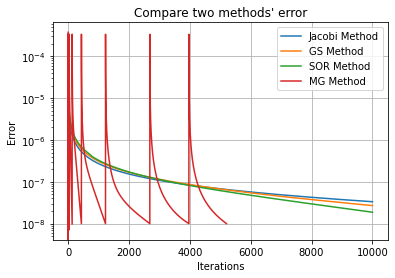

In [18]:
plt.plot(error_1, label='Jacobi Method')
plt.plot(error_2, label='GS Method')
plt.plot(error_3, label='SOR Method')
plt.plot(error_MG, label='MG Method')
plt.yscale('log')
plt.legend()
plt.grid()
plt.title('Compare two methods\' error')
plt.xlabel('Iterations')
plt.ylabel('Error');
plt.savefig('P7.pdf')

In [19]:
V.shape

(257, 257)

In [20]:
len(error_MG)

5206